<b>HOMEWORK 6</b>

<br>Semih KARACAOĞLU 17050111008</br>
<br>Mehmet AY 16050111043</br>
<br>Muhammed Said POLAT 18050111009</br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [12]:
#random data generation
X = np.random.uniform(-1, 10, size = (200,2));
np.random.seed(0)

n1,n2 = 100,100
n = n1+n2

X1 = np.random.normal([4,6], 0.5, (n1, 2))
X2 = np.random.normal([-1,1], 0.3, (n2, 2))

X = np.concatenate((X1,X2))
np.random.shuffle(X)

y = 1*np.logical_xor(X[:, 0] > 0 , X[:, 1] > 0)
y[y==0] = -1

noiseLevel = 0.6
noise = noiseLevel * np.random.randn(n, 2)
X +=noise 

<u>1. Maximal Margin</u>

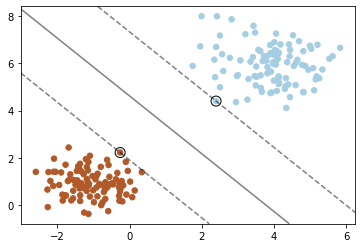

In [76]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)
Y_hat = clf.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

#show misclassification
wrong = (y == Y_hat)
wrong = X[wrong==False]
ax.scatter(wrong[:,0], wrong[:,1], s=30,alpha = 1, linewidth=1, facecolors='red', edgecolors='k', label="misclassification")

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors

ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k"
)
plt.show()

<hr style="border:2px solid gray"> </hr>

<u>2. Support Vector Classiffer</u>

In [89]:
#random data generation
X = np.random.uniform(-1, 10, size = (200,2));
np.random.seed(0)

n1,n2 = 100,100
n = n1+n2

X1 = np.random.normal([4,6], 1, (n1, 2))
X2 = np.random.normal([-1,1], 1, (n2, 2))

X = np.concatenate((X1,X2))
np.random.shuffle(X)

y = 1*np.logical_xor(X[:, 0] > 0 , X[:, 1] > 0)
y[y==0] = -1

noiseLevel = 0.6
noise = noiseLevel * np.random.randn(n, 2)
X +=noise 

In [90]:
from sklearn.model_selection import cross_val_score

#find best degree

kfold=10
best_degree = 1
best_score = 0
scores = []

for i in range(1,10):
    svm_classifier = SVC(kernel="poly",degree=i)
    svmScores = cross_val_score(svm_classifier, X, y.ravel(), cv=kfold, scoring="accuracy")
    score = statistics.mean(svmScores)
    scores.append(score)
    
    if score > best_score:
        best_score=score
        best_degree=i
    print('Average accuracy in 10- fold cross-validation for SVM with degree',i , ' is ', score)

print("\n\nBest degree is",best_degree," with score ",best_score)

Average accuracy in 10- fold cross-validation for SVM with degree 1  is  0.88
Average accuracy in 10- fold cross-validation for SVM with degree 2  is  0.88
Average accuracy in 10- fold cross-validation for SVM with degree 3  is  0.88
Average accuracy in 10- fold cross-validation for SVM with degree 4  is  0.88
Average accuracy in 10- fold cross-validation for SVM with degree 5  is  0.88
Average accuracy in 10- fold cross-validation for SVM with degree 6  is  0.88
Average accuracy in 10- fold cross-validation for SVM with degree 7  is  0.88
Average accuracy in 10- fold cross-validation for SVM with degree 8  is  0.88
Average accuracy in 10- fold cross-validation for SVM with degree 9  is  0.88


Best degree is 1  with score  0.88


In [91]:
from sklearn.model_selection import cross_val_score
import statistics

#find optimum C

scores = []
best_C = 1
best_score = 0
rangeC = 1000
for c in range(1,rangeC):
    svm_classifier = SVC(kernel="poly",degree=best_degree,C=c/100)
    svmScores = cross_val_score(svm_classifier, X, y.ravel(), cv=kfold, scoring="accuracy")
    score = statistics.mean(svmScores)
    scores.append(score)
    if score > best_score:
        best_score=score
        best_C=c/100
    #print('Average accuracy in 10- fold cross-validation for SVM with degree',best_degree ,"and C",c, ' is ', score)

print("\n\nBest C is",best_C," with score ",best_score)



Best C is 0.02  with score  0.88


In [92]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

svm_classifier = SVC(kernel="poly",degree=best_degree,C=best_C)
svm_classifier.fit(X,y)
Y_hat = svm_classifier.predict(X)
print(classification_report(y,Y_hat))

              precision    recall  f1-score   support

          -1       1.00      0.81      0.89       124
           1       0.76      1.00      0.86        76

    accuracy                           0.88       200
   macro avg       0.88      0.90      0.88       200
weighted avg       0.91      0.88      0.88       200



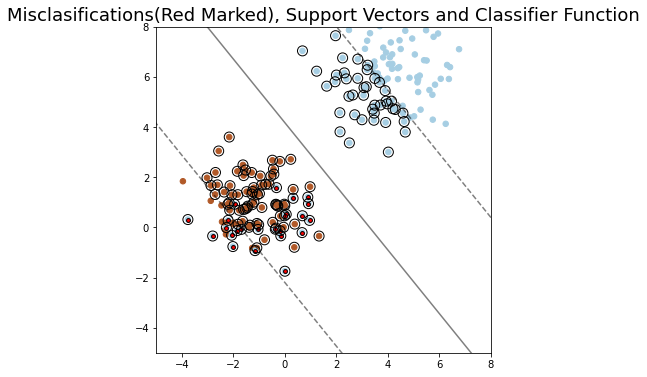

In [99]:
fig, ax = plt.subplots(figsize=(6, 6))

squareSpace = 8
xx, yy = np.meshgrid(np.linspace(-squareSpace, squareSpace, 500), np.linspace(-squareSpace, squareSpace, 500))
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, s=30)

#show misclassification
wrong = (y == Y_hat)
wrong = X[wrong==False]
ax.scatter(wrong[:,0], wrong[:,1], s=15,alpha = 1, linewidth=1, facecolors='red', edgecolors='k', label="misclassification")

# Get the separating hyperplane
Z = svm_classifier.decision_function(xy).reshape(xx.shape)

# Draw the decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

support_vecX1 = svm_classifier.support_vectors_[:, 0]
support_vecX2 = svm_classifier.support_vectors_[:, 1]
# Highlight support vectors with a circle around them
# ax.scatter(support_vecX1, support_vecX2, s=100, linewidth=1, facecolors='none', edgecolors='k',label='(highlighted)support vectors')
ax.scatter(
    support_vecX1, 
    support_vecX2,
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    label= '(higlighted) support vectors'
)
support_vecX1, support_vecX2
# plt.legend()
plt.title("Misclasifications(Red Marked), Support Vectors and Classifier Function",fontsize=18)

plt.xlim(-5, 8)
plt.ylim(-5, 8)

plt.show()

In [111]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

svm_classifier = SVC(kernel="poly",degree=best_degree,C=1000)
svm_classifier.fit(X,y)
Y_hat = svm_classifier.predict(X)
print(classification_report(y,Y_hat))

              precision    recall  f1-score   support

          -1       0.98      0.81      0.88       124
           1       0.76      0.97      0.85        76

    accuracy                           0.87       200
   macro avg       0.87      0.89      0.87       200
weighted avg       0.89      0.87      0.87       200



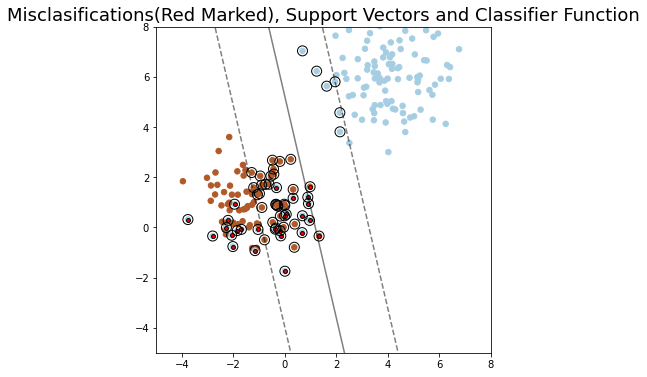

In [112]:
fig, ax = plt.subplots(figsize=(6, 6))

squareSpace = 8
xx, yy = np.meshgrid(np.linspace(-squareSpace, squareSpace, 500), np.linspace(-squareSpace, squareSpace, 500))
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, s=30)

#show misclassification
wrong = (y == Y_hat)
wrong = X[wrong==False]
ax.scatter(wrong[:,0], wrong[:,1], s=15,alpha = 1, linewidth=1, facecolors='red', edgecolors='k', label="misclassification")

# Get the separating hyperplane
Z = svm_classifier.decision_function(xy).reshape(xx.shape)

# Draw the decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

support_vecX1 = svm_classifier.support_vectors_[:, 0]
support_vecX2 = svm_classifier.support_vectors_[:, 1]
# Highlight support vectors with a circle around them
# ax.scatter(support_vecX1, support_vecX2, s=100, linewidth=1, facecolors='none', edgecolors='k',label='(highlighted)support vectors')
ax.scatter(
    support_vecX1, 
    support_vecX2,
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    label= '(higlighted) support vectors'
)
support_vecX1, support_vecX2
# plt.legend()
plt.title("Misclasifications(Red Marked), Support Vectors and Classifier Function",fontsize=18)

plt.xlim(-5, 8)
plt.ylim(-5, 8)

plt.show()

In [162]:
#random data generation
X = np.random.uniform(-1, 10, size = (200,2));
np.random.seed(0)

n1,n2,n3 = 100, 100, 100
n = n1+n2+n3

X1 = np.random.normal([4,6], 1, (n1, 2))
X2 = np.random.normal([-1,1], 1, (n2, 2))
X3 = np.random.normal([-1,1], 1, (n3, 2))

X = np.concatenate((X1,X2,X3))
np.random.shuffle(X)

y = 1*np.logical_xor(X[:, 0] > 0 , X[:, 1] > 0)
y[y==0] = -1

noiseLevel = 10
noise = noiseLevel * np.random.randn(n, 2)
X +=noise 

In [163]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

svm_classifier = SVC(kernel="poly",degree=best_degree,C=1000)
svm_classifier.fit(X,y)
Y_hat = svm_classifier.predict(X)
print(classification_report(y,Y_hat))

              precision    recall  f1-score   support

          -1       0.56      0.54      0.55       150
           1       0.55      0.57      0.56       150

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.56      0.56      0.56       300



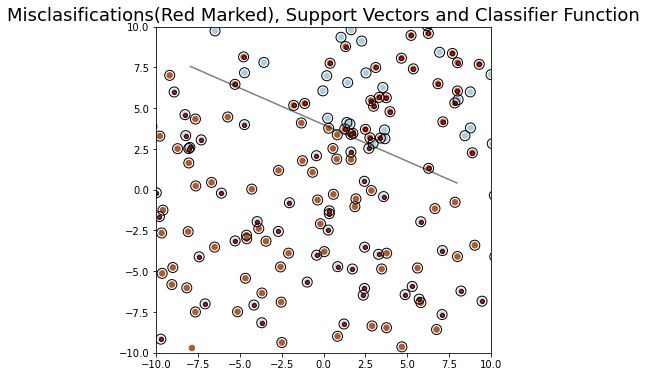

In [165]:
fig, ax = plt.subplots(figsize=(6, 6))

squareSpace = 8
xx, yy = np.meshgrid(np.linspace(-squareSpace, squareSpace, 500), np.linspace(-squareSpace, squareSpace, 500))
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, s=30)

#show misclassification
wrong = (y == Y_hat)
wrong = X[wrong==False]
ax.scatter(wrong[:,0], wrong[:,1], s=15,alpha = 1, linewidth=1, facecolors='red', edgecolors='k', label="misclassification")

# Get the separating hyperplane
Z = svm_classifier.decision_function(xy).reshape(xx.shape)

# Draw the decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

support_vecX1 = svm_classifier.support_vectors_[:, 0]
support_vecX2 = svm_classifier.support_vectors_[:, 1]
# Highlight support vectors with a circle around them
# ax.scatter(support_vecX1, support_vecX2, s=100, linewidth=1, facecolors='none', edgecolors='k',label='(highlighted)support vectors')
ax.scatter(
    support_vecX1, 
    support_vecX2,
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    label= '(higlighted) support vectors'
)
support_vecX1, support_vecX2
# plt.legend()
plt.title("Misclasifications(Red Marked), Support Vectors and Classifier Function",fontsize=18)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()